# Ethiopia Public Health Institute
## National Data Management Center
### Data Analytics, Modeling and Visualization Division


## Part II: Problem Solving Section

### Preprocessing and EDA
in this section data loading and undersatndin about the infromations are performed. Generally the specific tasks are predented below.

##### Importing the relevant libraries
Below are all the requiered pacakges for the analysis and modeling 

In [2]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import VotingClassifier

#### A. Loading the data

In [3]:
champ_df = pd.read_csv("./data/CHAMPS.csv")

In [ ]:
champ_df.hea

In [3]:
df_deco= champ_df[[ 'champs_id', 'dp_013', 'dp_108', 'dp_118']]

In [4]:
# reading first five row 
df_deco.head()

champs_id   dp_013                                   dp_108  \
0  ETAA00002  CH00716                             Undetermined   
1  ETAA00004  CH00716                             Undetermined   
2  ETAA00005  CH00716                     Intrauterine hypoxia   
3  ETAA00008  CH00719  Severe acute malnutrition - Kwashiorkor   
4  ETAA00009  CH01406                                   Sepsis   

                                              dp_118  
0                                       Undetermined  
1                                       Undetermined  
2  Fetus and newborn affected by other forms of p...  
3                                                NaN  
4                                                NaN

In [5]:
# shape of the dataset (rpws and column)
df_deco.shape

(444, 4)

In [6]:
# we can use info
df_deco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   champs_id  444 non-null    object
 1   dp_013     444 non-null    object
 2   dp_108     444 non-null    object
 3   dp_118     197 non-null    object
dtypes: object(4)
memory usage: 14.0+ KB


In [7]:
#description 
df_deco.describe()

champs_id   dp_013                dp_108        dp_118
count         444      444                   444           197
unique        444        6                    97            97
top     ETAA00002  CH00716  Intrauterine hypoxia  Preeclampsia
freq            1      239                   148            36

In [8]:
# enumerat column
df_deco.columns

Index(['champs_id', 'dp_013', 'dp_108', 'dp_118'], dtype='object')

### Rename columns

In [9]:
# converting to list 
old_columns = df_deco.columns.tolist()

In [10]:
old_columns

['champs_id', 'dp_013', 'dp_108', 'dp_118']

In [11]:
new_columns = ['CHAMPS_ID', 'Case Type', 'Underlying Cause', 'Maternal Factor']

In [12]:
# now Mapping 
column_mapp = dict(zip(old_columns, new_columns))


In [13]:
# renaming columns accordingly 
df_deco.rename(columns=column_mapp, inplace=True)

In [14]:
df_deco.head()

CHAMPS_ID Case Type                         Underlying Cause  \
0  ETAA00002   CH00716                             Undetermined   
1  ETAA00004   CH00716                             Undetermined   
2  ETAA00005   CH00716                     Intrauterine hypoxia   
3  ETAA00008   CH00719  Severe acute malnutrition - Kwashiorkor   
4  ETAA00009   CH01406                                   Sepsis   

                                     Maternal Factor  
0                                       Undetermined  
1                                       Undetermined  
2  Fetus and newborn affected by other forms of p...  
3                                                NaN  
4                                                NaN

In [15]:
# stay there
print(f'the number of columns are  {len(old_columns)}')

the number of columns are  4


In [16]:
 # best way to Enumerate the columns
# for i, column in enumerate(champ_df.columns):
    #print(f"Column {i+1}:{column}")

### updating values 

In [17]:
# exploring the values of case type
df_deco['Case Type'].value_counts()

CH00716    239
CH01404     69
CH01405     49
CH00719     42
CH00718     27
CH01406     18
Name: Case Type, dtype: int64

In [18]:
# replacing the values 
df_deco['Case Type'].replace({'CH00716': 'Stillbirth', 'CH01404': 'Death in the first 24 hours', 
                        'CH01405' : 'Early Neonate (1 to 6 days)', 'CH00719' : 'Child (12 months to less than 60 months)', 
                        'CH00718':'Infant (28 days to less than 12 months)', 
                        'CH01406' :'Late Neonate (7 to 27 days)',  }, inplace=True)


In [19]:
df_deco.sample()

CHAMPS_ID   Case Type                 Underlying Cause Maternal Factor
76  ETAA00163  Stillbirth  Intrauterine growth restriction    Preeclampsia

### Null propertion

In [20]:
# Calculate proportion of null values in each column
null_proportion = df_deco.isnull().mean()

print(null_proportion)

CHAMPS_ID           0.000000
Case Type           0.000000
Underlying Cause    0.000000
Maternal Factor     0.556306
dtype: float64


## 2. Descriptive Data analysis: looking back to the dataset above

### A. What are the magnitude and proportion of each of the infant underlying cause for child death?


#### Identify underlying cause:

> Here the we identify the cause of death for infants. This is named as `Underlying Cause`.

In [21]:
# Calculate magnitude (count of each cause of death)
cause_counts = df_deco['Underlying Cause'].value_counts()

# Calculate total number of deaths
total_deaths = cause_counts.sum()

# Calculate proportion (percentage of each cause of death)
cause_proportions = (cause_counts / total_deaths) * 100

# Combine magnitude and proportion into a DataFrame
cause_summary = pd.DataFrame({
    'Magnitude': cause_counts,
    'Proportion (%)': cause_proportions
})

print(cause_summary)


                                                  Magnitude  Proportion (%)
Intrauterine hypoxia                                    148       33.333333
Birth asphyxia                                           33        7.432432
Undetermined                                             28        6.306306
Severe acute malnutrition                                24        5.405405
Craniorachischisis                                       16        3.603604
...                                                     ...             ...
Severe acute malnutrition-Kwashiorkor                     1        0.225225
severe acute malnutrition, Marasmic Kwashiorkor           1        0.225225
Severe acute malnutrition - Marasmic kwashiorkor          1        0.225225
Congenital CMV infection                                  1        0.225225
Bacterial sepsis of the newborn                           1        0.225225

[97 rows x 2 columns]


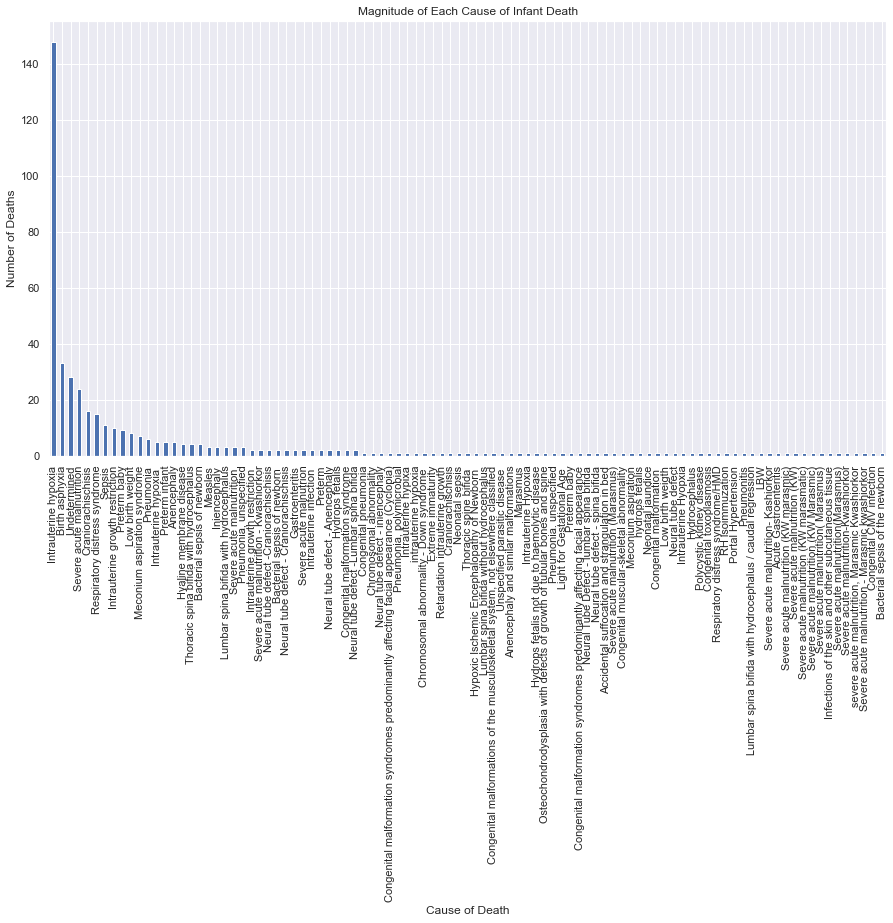

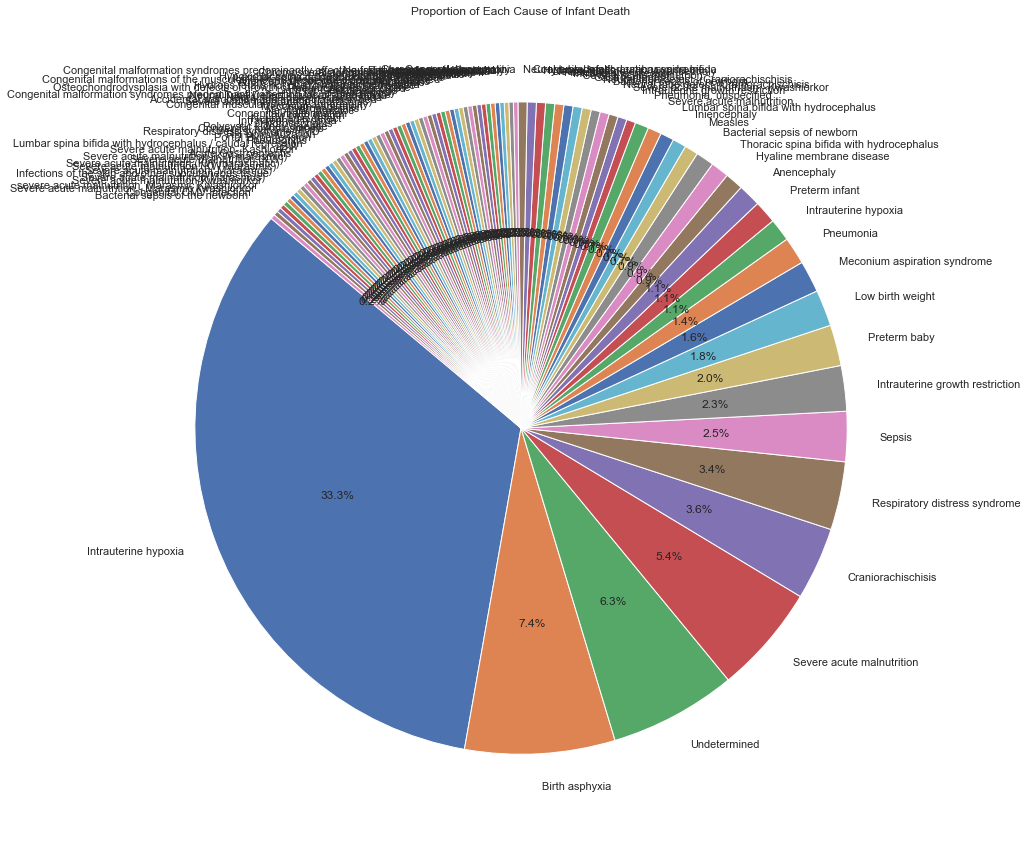

In [68]:
# Visualize data 
# Bar plot for magnitude of each cause
plt.figure(figsize=(15, 8))
cause_counts.plot(kind='bar')
plt.title('Magnitude of Each Cause of Infant Death')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.show()

# Pie chart for the proportion of each cause
plt.figure(figsize=(20, 15))
cause_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Cause of Infant Death')
plt.ylabel('')
plt.show()


### B. What are the proportion and magnitude of the maternal factors contributing for child death?


### Identify Maternal Factors:

> Determine how maternal factors are labeled or coded in your dataset. This could be specific columns or codes in the cause of death data.


In [23]:
df_deco.columns

Index(['CHAMPS_ID', 'Case Type', 'Underlying Cause', 'Maternal Factor'], dtype='object')

In [24]:
#child deat with maternal factor contribution 
maternal_factors_data = df_deco[df_deco['Maternal Factor'].notnull()]

In [25]:
# Calculate magnitude (count of each maternal factor)
maternal_factor_counts = maternal_factors_data['Underlying Cause'].value_counts()

# Calculate total number of deaths influenced by maternal factors
total_maternal_deaths = maternal_factor_counts.sum()

# Calculate proportion (percentage of each maternal factor)
maternal_factor_proportions = (maternal_factor_counts / total_maternal_deaths) * 100

# Combine magnitude and proportion into a DataFrame
maternal_factor_summary = pd.DataFrame({
    'Magnitude': maternal_factor_counts,
    'Proportion (%)': maternal_factor_proportions
})

print(maternal_factor_summary)


                                          Magnitude  Proportion (%)
Intrauterine hypoxia                             98       49.746193
Birth asphyxia                                   17        8.629442
Respiratory distress syndrome                    13        6.598985
Intrauterine growth restriction                   8        4.060914
Low birth weight                                  6        3.045685
Preterm infant                                    5        2.538071
Preterm baby                                      5        2.538071
Sepsis                                            5        2.538071
Undetermined                                      4        2.030457
Hyaline membrane disease                          4        2.030457
Intrauterine hypoxia                              3        1.522843
Intrauterine growth restriction                   2        1.015228
Meconium aspiration syndrome                      2        1.015228
Intrauterine infection                          

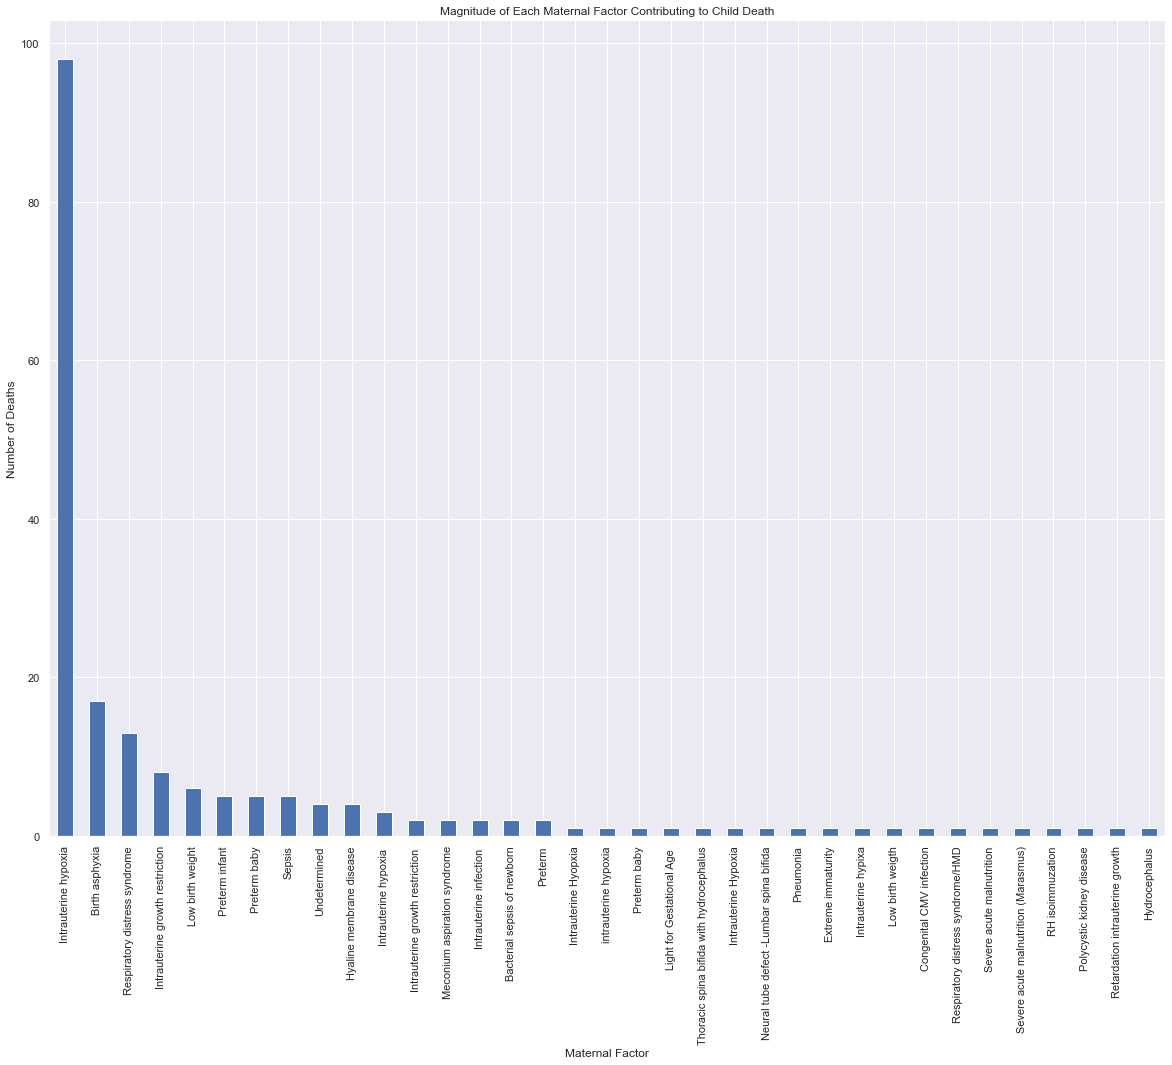

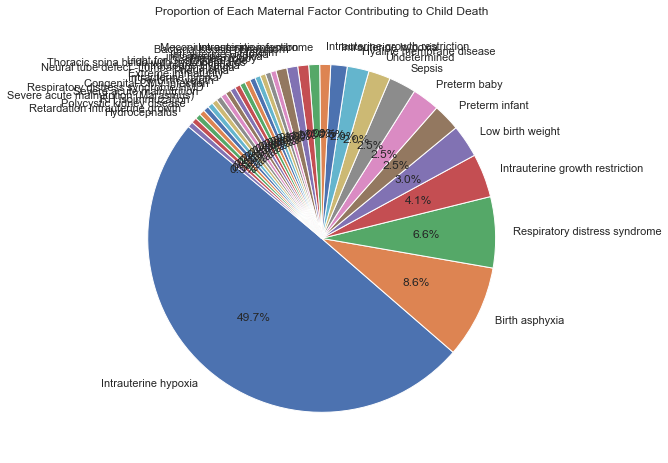

In [69]:
import matplotlib.pyplot as plt

# Bar plot for magnitude of each maternal factor
plt.figure(figsize=(20, 15))
maternal_factor_counts.plot(kind='bar')
plt.title('Magnitude of Each Maternal Factor Contributing to Child Death')
plt.xlabel('Maternal Factor')
plt.ylabel('Number of Deaths')
plt.show()

# Pie chart for the proportion of each maternal factor
plt.figure(figsize=(12, 8))
maternal_factor_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Maternal Factor Contributing to Child Death')
plt.ylabel('')
plt.show()


### C.What are the proportion of the child death by the case type

#### Identify Case Type Column:

> Ensure you have a column that specifies the case type of each child death. This might be labeled something like Case_Type.

In [27]:
# Calculate the count of each case type
case_type_counts = df_deco['Case Type'].value_counts()

# Calculate total number of deaths
total_deaths = case_type_counts.sum()

# Calculate proportion (percentage) of each case type
case_type_proportions = (case_type_counts / total_deaths) * 100

# Combine count and proportion into a DataFrame
case_type_summary = pd.DataFrame({
    'Count': case_type_counts,
    'Proportion (%)': case_type_proportions
})

print(case_type_summary)


                                          Count  Proportion (%)
Stillbirth                                  239       53.828829
Death in the first 24 hours                  69       15.540541
Early Neonate (1 to 6 days)                  49       11.036036
Child (12 months to less than 60 months)     42        9.459459
Infant (28 days to less than 12 months)      27        6.081081
Late Neonate (7 to 27 days)                  18        4.054054


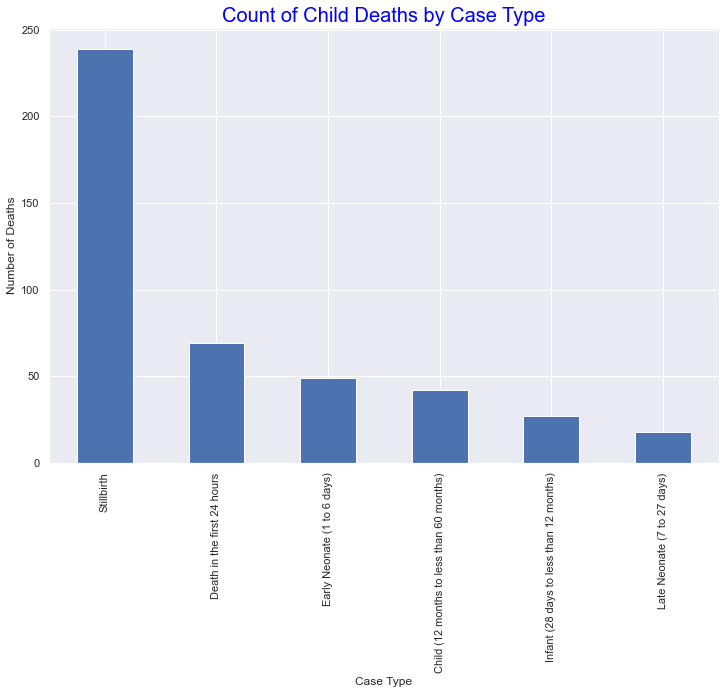

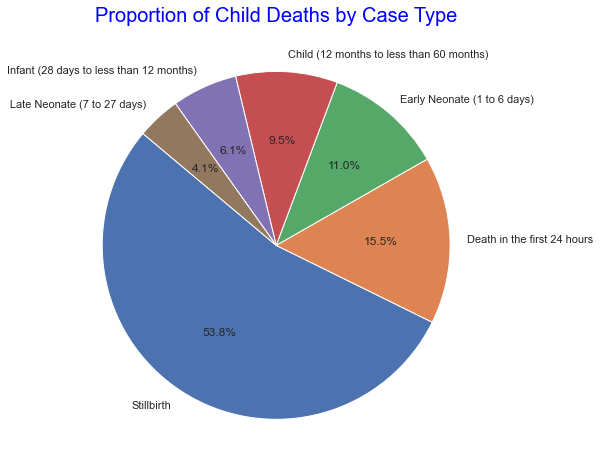

In [71]:
# Visualization 

# Bar plot for the count of each case type
plt.figure(figsize=(12, 8))
case_type_counts.plot(kind='bar')
plt.title('Count of Child Deaths by Case Type', fontsize =20, color='blue')
plt.xlabel('Case Type')
plt.ylabel('Number of Deaths')
plt.show()

# Pie chart for the proportion of each case type
plt.figure(figsize=(12, 8))
case_type_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Child Deaths by Case Type', fontsize =20, color='blue')
plt.ylabel('')
plt.show()


## 3.	Correlation analysis: Using correlation or Heat Maps, show how each of the infant under lying conditions and maternal factors are correlated to the top three causes of the child death identified above under 2(A)

In [29]:
df_deco.columns

Index(['CHAMPS_ID', 'Case Type', 'Underlying Cause', 'Maternal Factor'], dtype='object')

In [30]:
# filter top three cause of death
top_3_causes = df_deco['Underlying Cause'].value_counts().head(3).index.tolist()
filtered_data = df_deco[df_deco['Underlying Cause'].isin(top_3_causes)]


In [31]:
top_3_causes

['Intrauterine hypoxia', 'Birth asphyxia', 'Undetermined']

In [32]:
#filtered_data

#### Prepare Data for Correlation Analysis:
> Create dummy variables for categorical columns.
> For example, if Underlying Condition and Maternal Factor are categorical, use one-hot encoding.

In [33]:

data_encoded = pd.get_dummies(filtered_data, columns=['Case Type', 'Underlying Cause', 'Maternal Factor'])

# Display the first few rows to understand its structure
print(data_encoded.head())

   CHAMPS_ID  Case Type_Child (12 months to less than 60 months)  \
0  ETAA00002                                                  0    
1  ETAA00004                                                  0    
2  ETAA00005                                                  0    
7  ETAA00017                                                  0    
8  ETAA00018                                                  0    

   Case Type_Death in the first 24 hours  \
0                                      0   
1                                      0   
2                                      0   
7                                      0   
8                                      0   

   Case Type_Early Neonate (1 to 6 days)  \
0                                      0   
1                                      0   
2                                      0   
7                                      0   
8                                      0   

   Case Type_Infant (28 days to less than 12 months)  \
0    

#### correlation analysis

In [34]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Extract the correlation for top causes of death
top_causes_correlation = correlation_matrix.loc[:, correlation_matrix.columns.str.contains('|'.join(top_3_causes))]

# Display the correlation matrix
print(top_causes_correlation)


                                                    Underlying Cause_Birth asphyxia  \
Case Type_Child (12 months to less than 60 months)                        -0.042563   
Case Type_Death in the first 24 hours                                      0.568182   
Case Type_Early Neonate (1 to 6 days)                                      0.489648   
Case Type_Infant (28 days to less than 12 months)                         -0.042563   
Case Type_Late Neonate (7 to 27 days)                                     -0.030024   
...                                                                             ...   
Maternal Factor_Severe preeclampsia                                       -0.030024   
Maternal Factor_Twin pregnancy                                            -0.052255   
Maternal Factor_Undetermined                                              -0.042563   
Maternal Factor_Uterine rupture                                            0.092219   
Maternal Factor_preeclampsia               

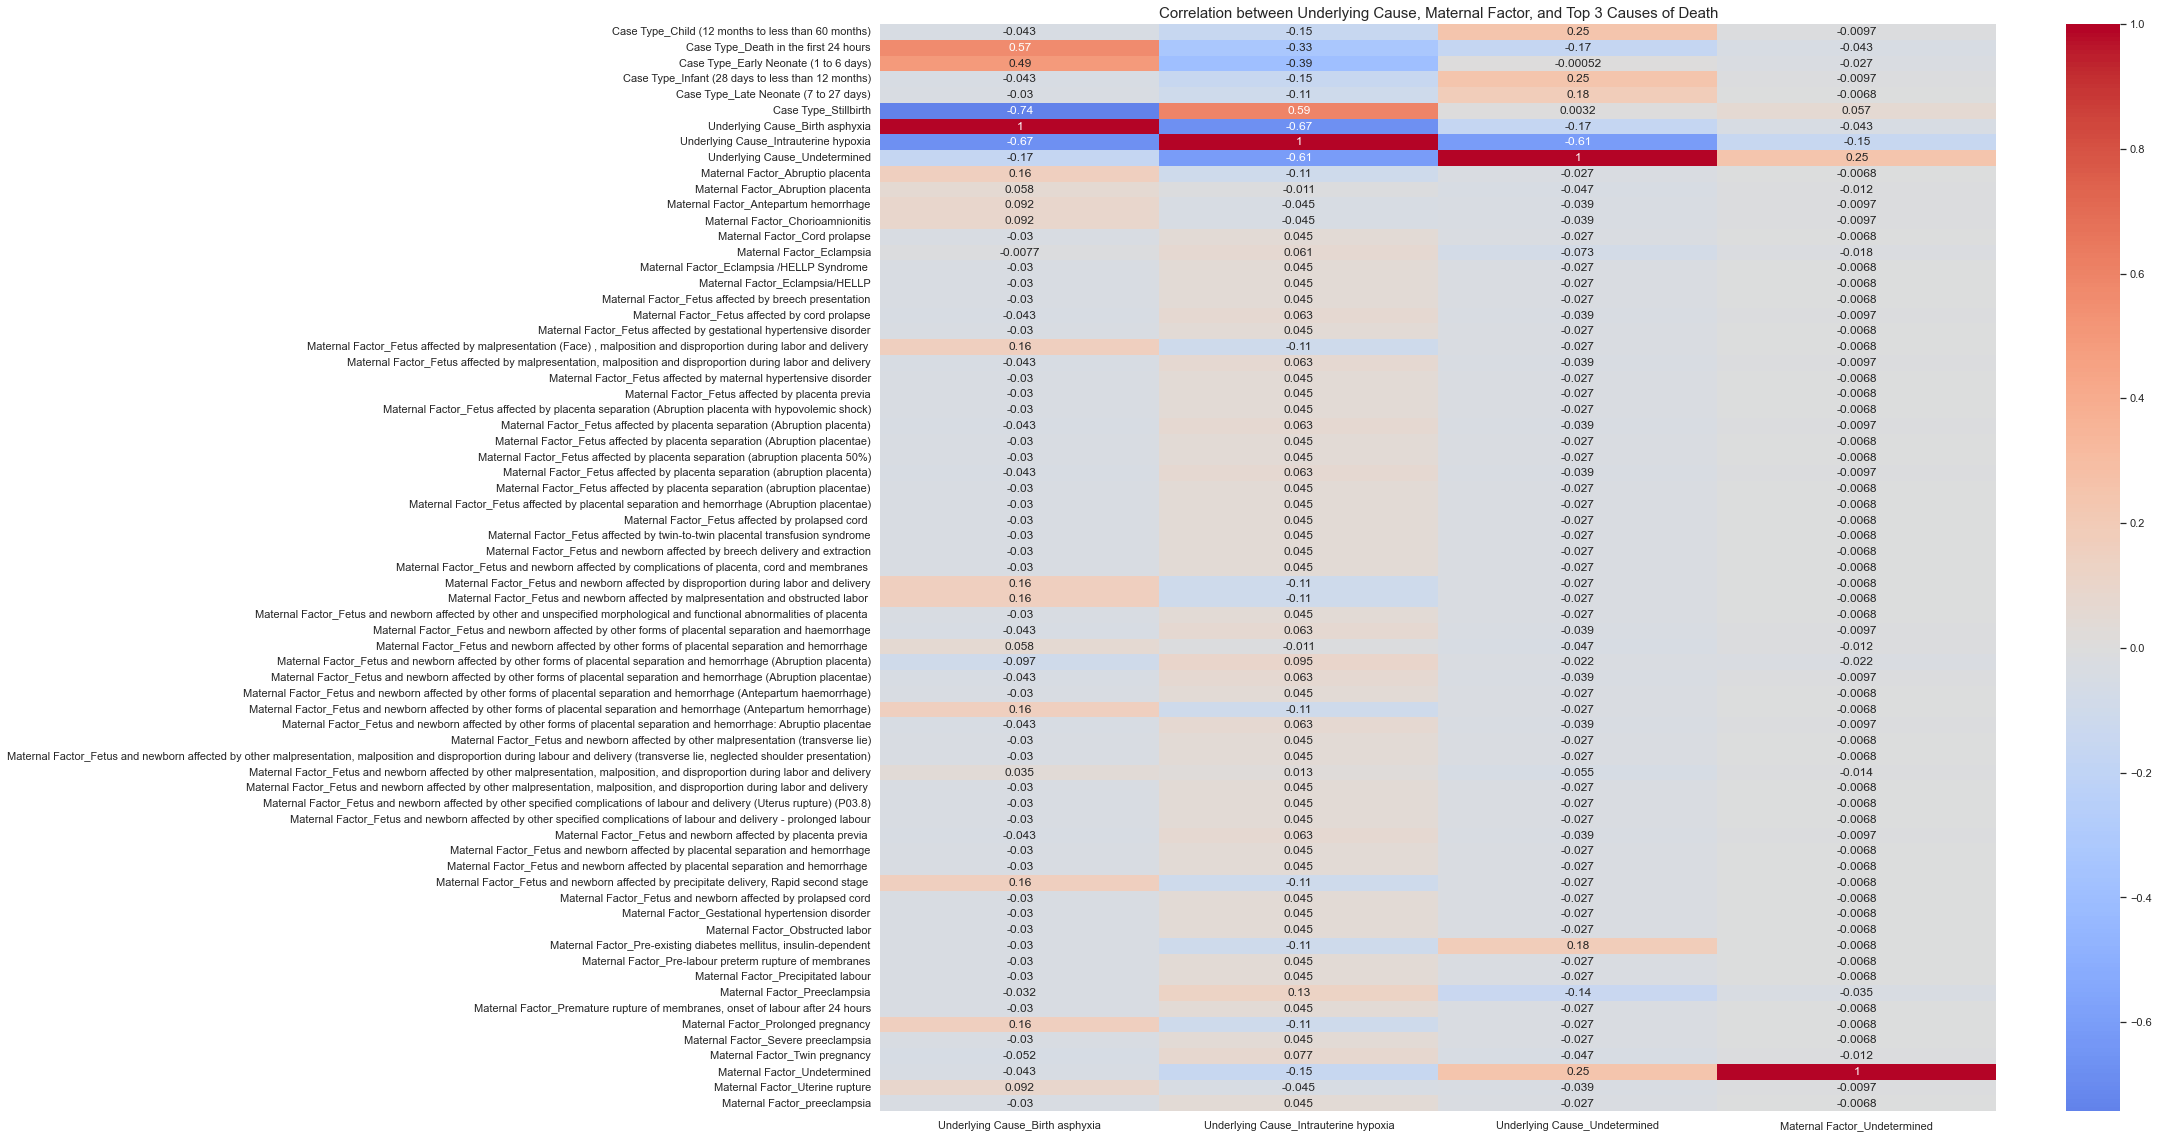

In [72]:
# using heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heat map for the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(top_causes_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Underlying Cause, Maternal Factor, and Top 3 Causes of Death', size =15)
plt.show()


## 4.Feature engineering:  You are expected to select the top infant underlying causes and maternal factors(features) that would contribute to the top three causes of child death identified under 2(A) above. For this, you need to select the best and likely features. In doing so:

### A. Select the classification models LogisticRegression, Support Vector Machine, AdaBoostClassifier,  Random Forest Classifier ,  Gradient Boosting Classifier  and XGBOOST and train  each on the dataset


### B. Import the appropriate package for each of the classification models above

### C. Rank the features based on their importance for each of the top underlying causes of child death identified above under 2(A), for each of the classification algorithms under (A )

#### Step 1

In [36]:
# Identify the top three underlying causes of death
top_causes = df_deco['Underlying Cause'].value_counts().head(3).index.tolist()
print("Top 3 Underlying Causes of Death:", top_causes)

# Filter the dataset to include only the top three underlying causes of death
filtered_data = df_deco[df_deco['Underlying Cause'].isin(top_causes)]


Top 3 Underlying Causes of Death: ['Intrauterine hypoxia', 'Birth asphyxia', 'Undetermined']


In [37]:
df_deco.columns

Index(['CHAMPS_ID', 'Case Type', 'Underlying Cause', 'Maternal Factor'], dtype='object')

In [38]:
# Encoding 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# One-hot encode categorical columns for 'Case Type' and 'Maternal Factor'
data_encoded = pd.get_dummies(filtered_data, columns=['Case Type', 'Maternal Factor'])

# Set the target variable
y = data_encoded['Underlying Cause']

# Encode the target variable as integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Set the feature variables, excluding 'ID' and 'Underlying Cause'
X = data_encoded.drop(columns=['Underlying Cause', 'CHAMPS_ID'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Step 2: Train Classification Models

In [40]:
# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train each classifier and collect feature importances
feature_importances = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    if hasattr(clf, 'coef_'):
        importances = clf.coef_[0]
    elif hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
    feature_importances[name] = importances


#### Step 3: Rank Features Based on Importance


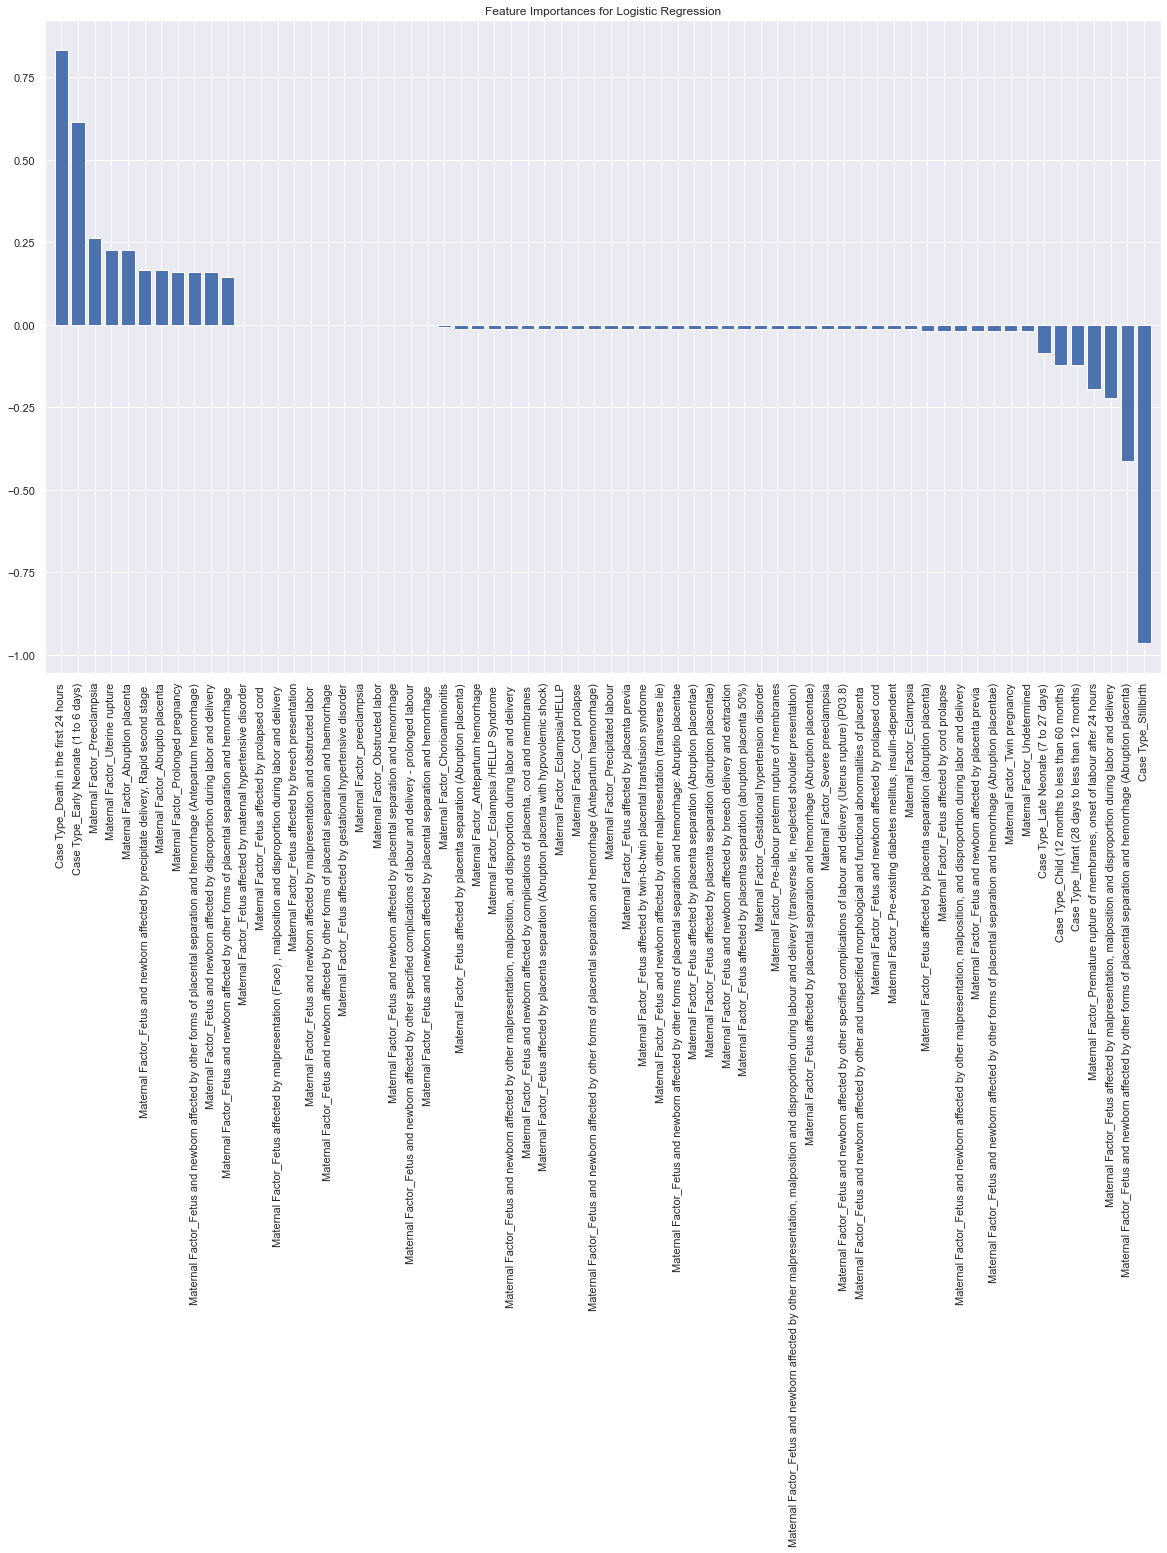

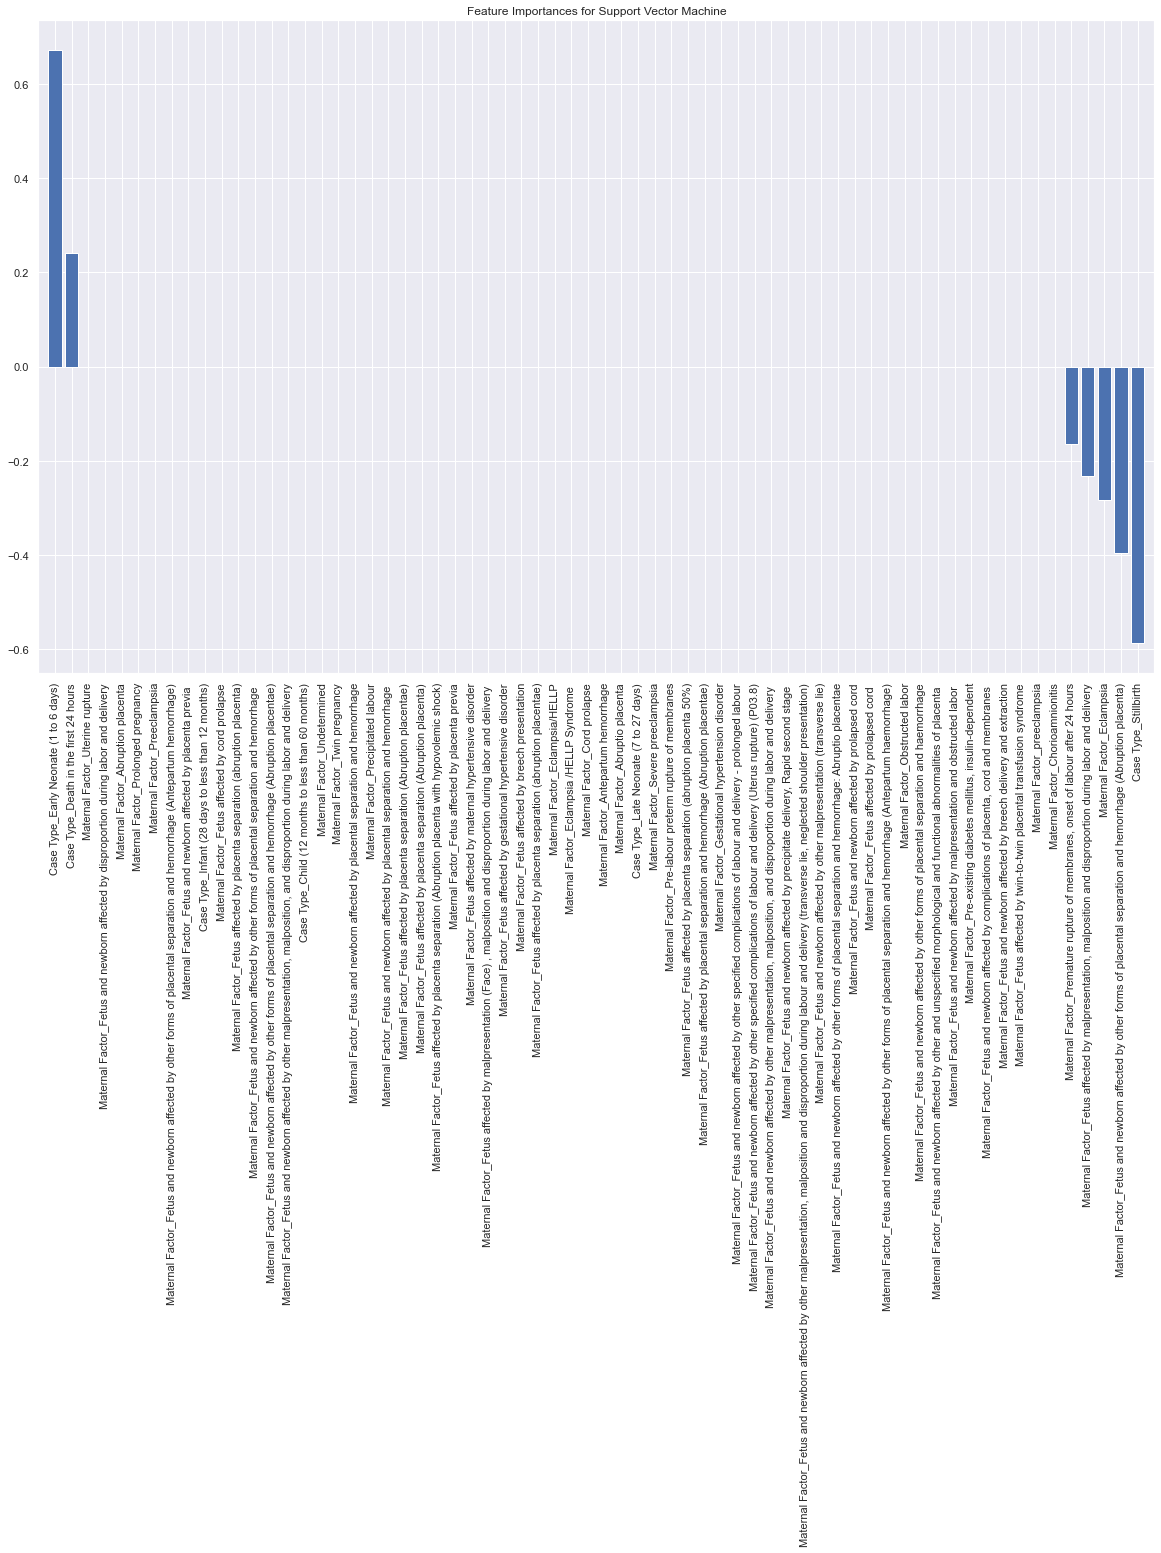

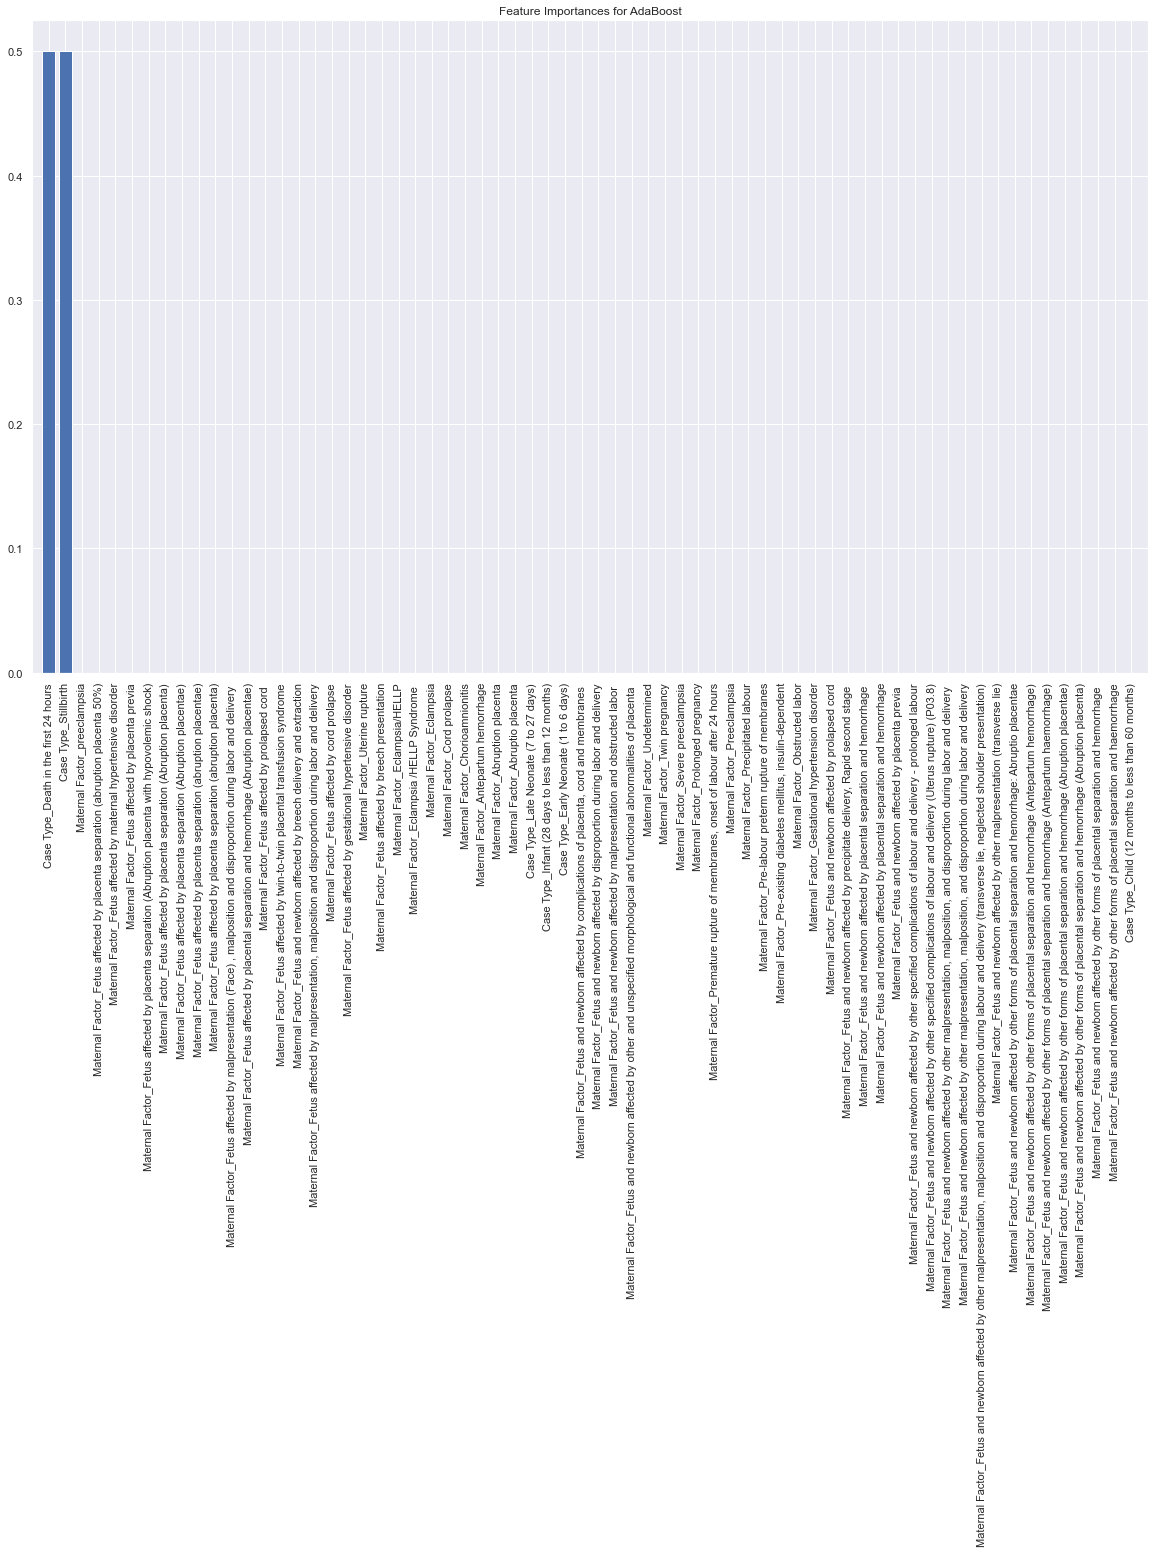

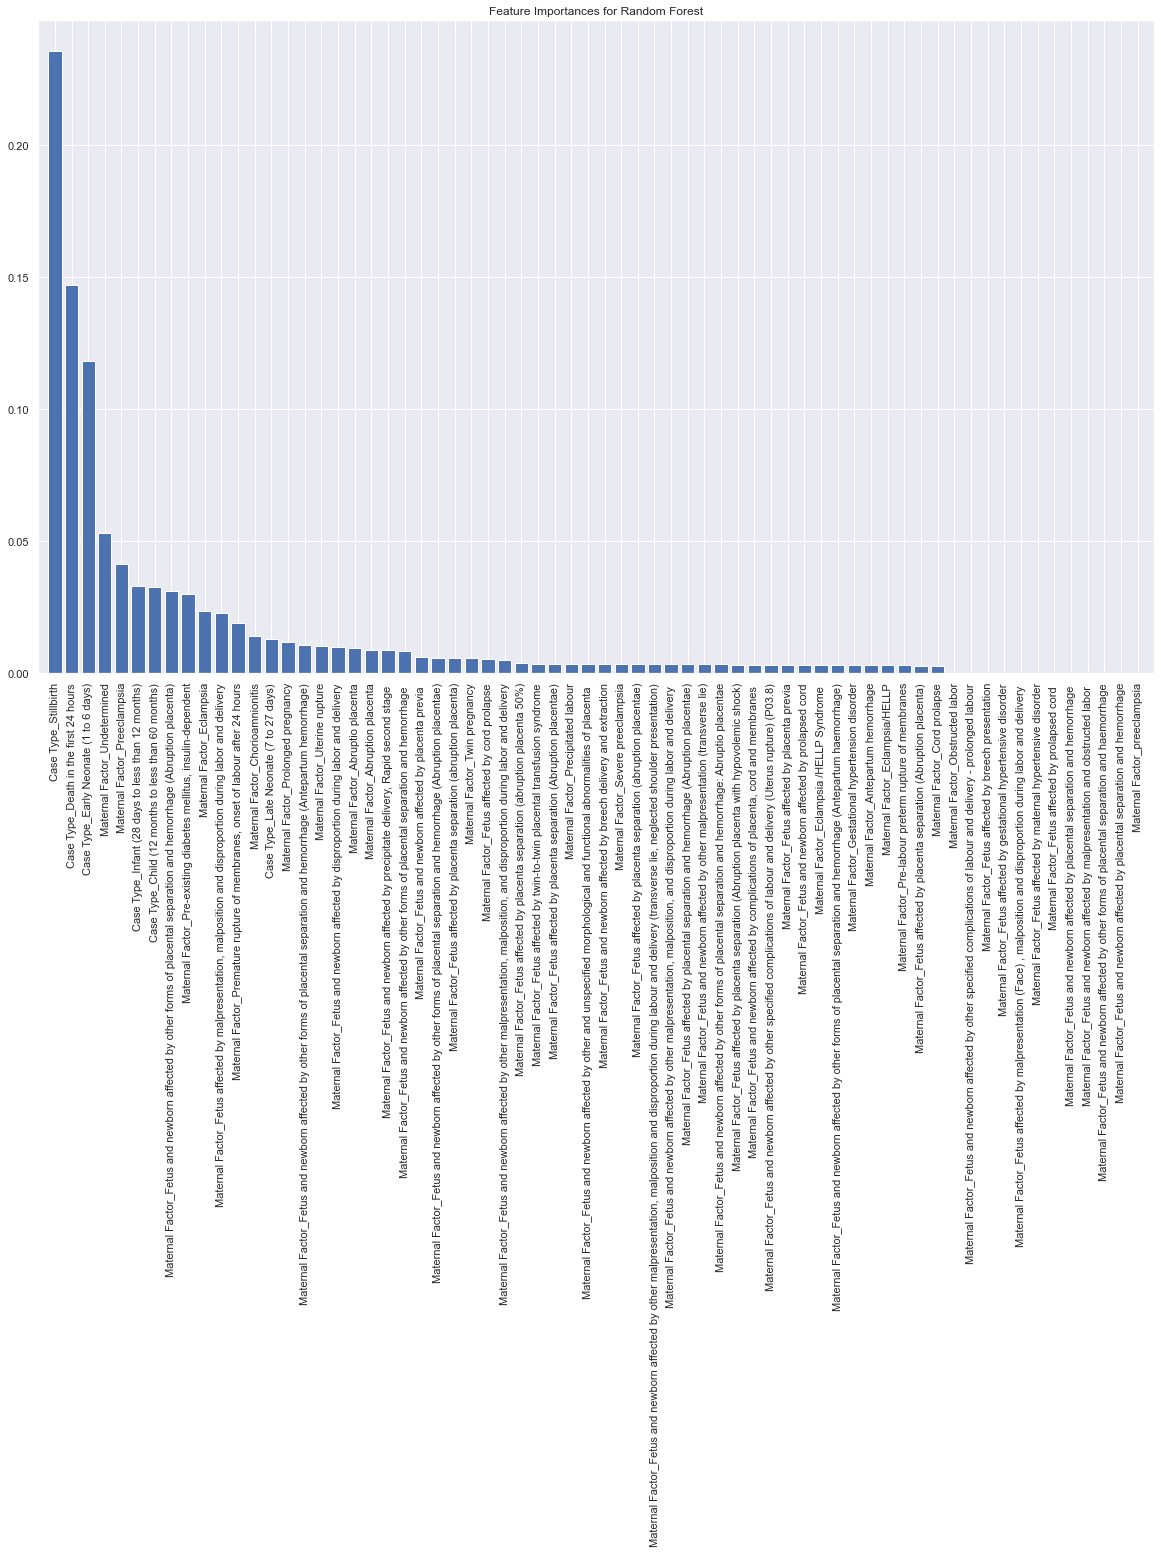

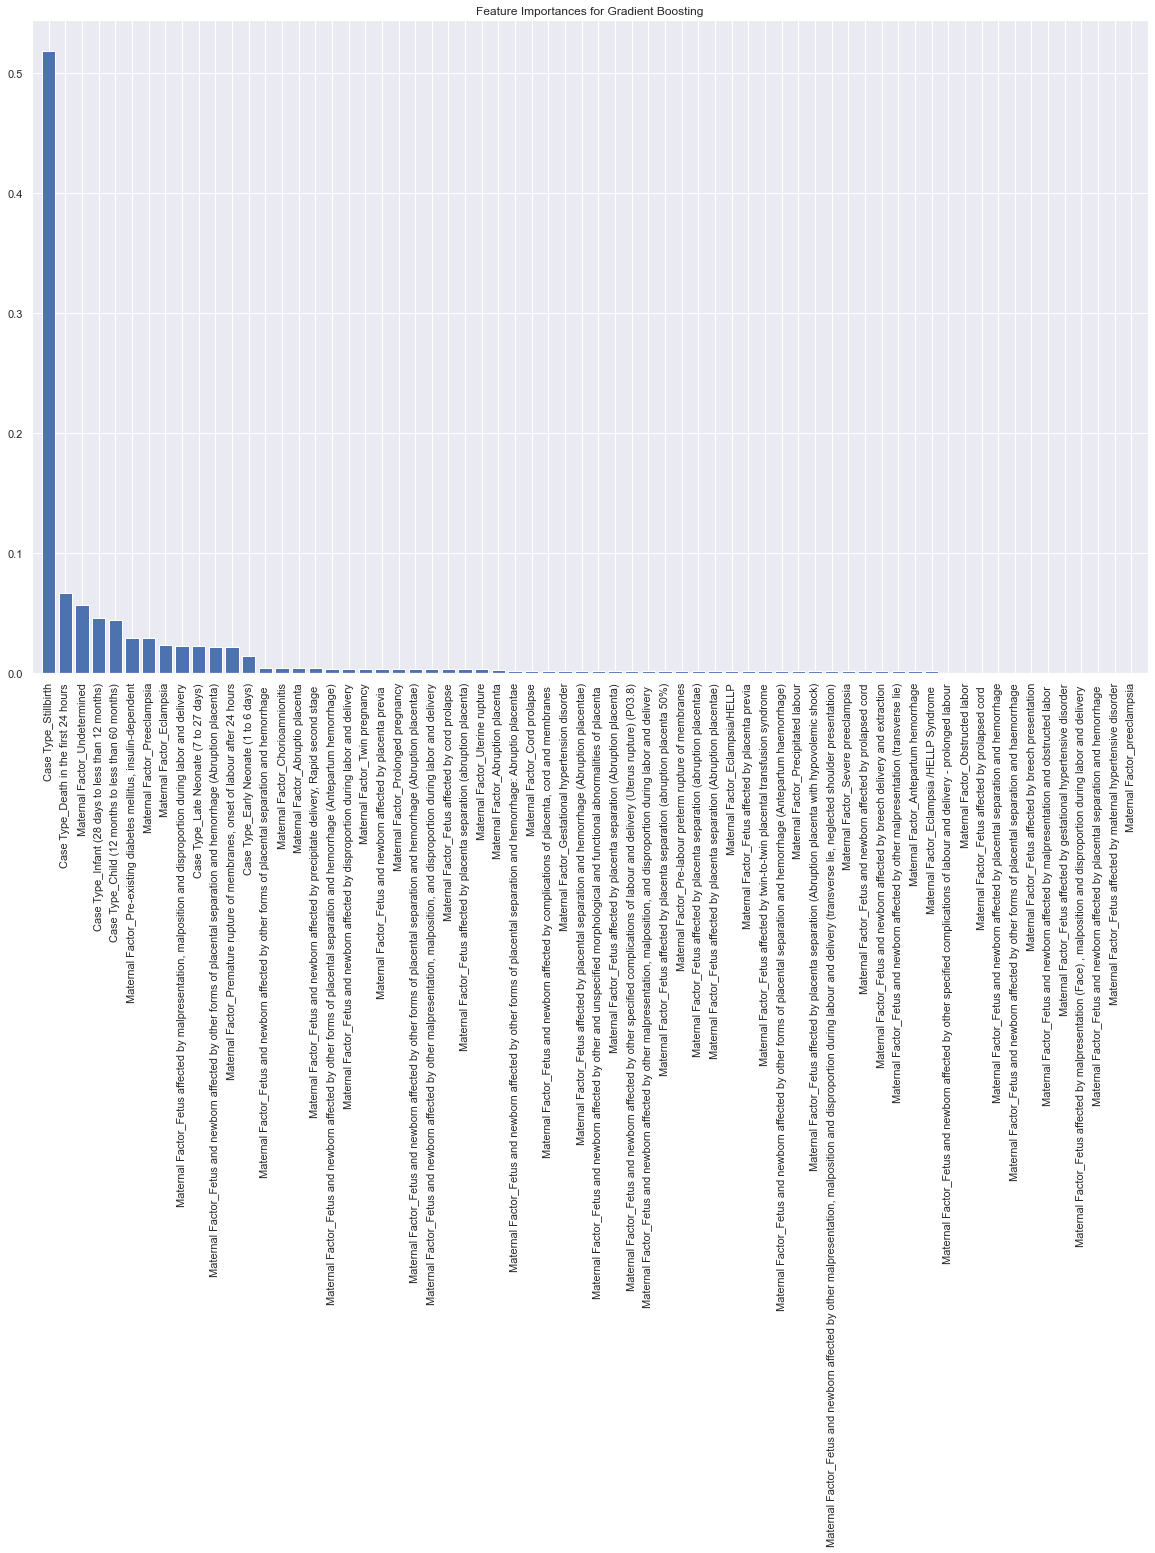

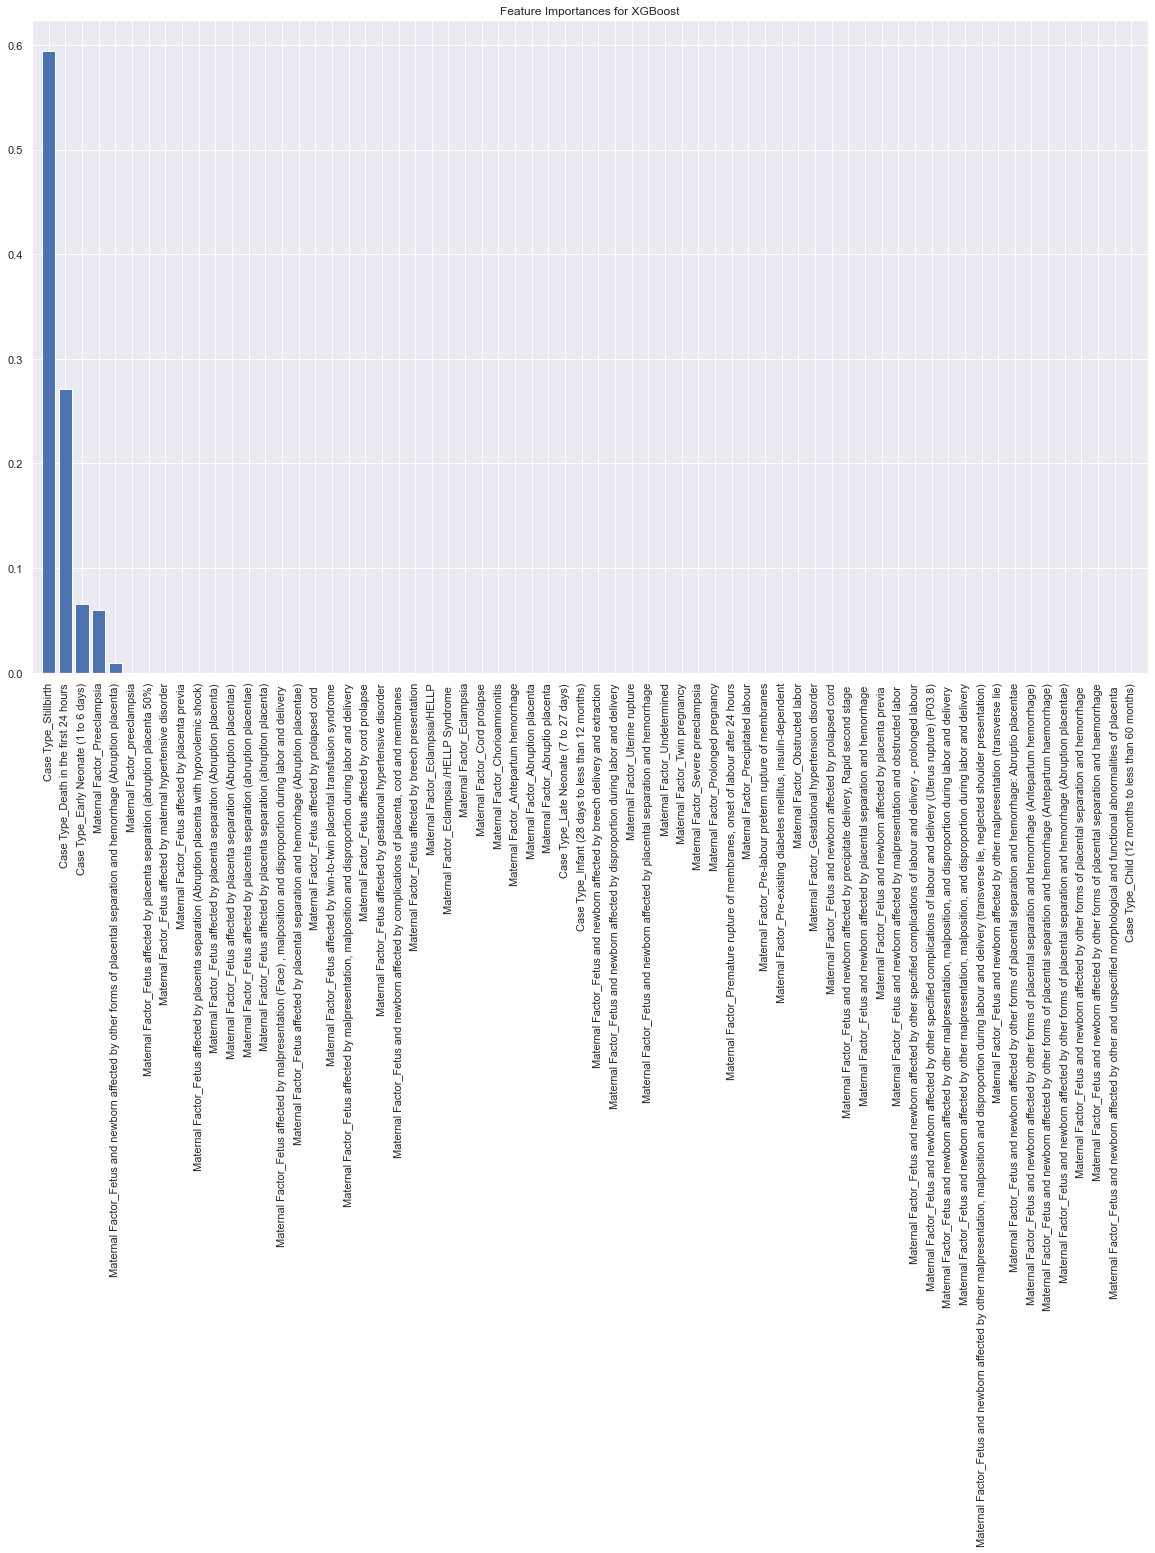

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Plot feature importances for each classifier
for name, importances in feature_importances.items():
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(20, 12))
    plt.title(f'Feature Importances for {name}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()


## 5. Model evaluation using the proper metrics
### A.	Import the appropriate evaluation metric packages
### B.	Using the appropriate n-fold cross validation and out of sample data, select the best preforming model from the candidate models under 4(A)
### C.	Ensemble the models and see the performance  of the  combination models on the data
### D.	Use Accuracy score metrics to evaluate the performance of the models above 
### E.	Plot the AUC and ROC curve on the same graph to visualize and compare the performance of each of the models above


In [42]:
# importing packages 



In [43]:
# Set up n-fold cross-validation
n_folds = 4
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)


In [44]:
#Evaluate Each Model Using Cross-Validation:

cv_results = {}

for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    cv_results[name] = cv_scores
    print(f"{name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Select the best performing model based on mean cross-validation score
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
best_model = classifiers[best_model_name]
print(f"Best Model: {best_model_name}")


Logistic Regression: 0.7937 ± 0.0654
Support Vector Machine: 0.8076 ± 0.0717
AdaBoost: 0.2738 ± 0.0169
Random Forest: 0.8146 ± 0.0751
Gradient Boosting: 0.8078 ± 0.0688
XGBoost: 0.7939 ± 0.0619
Best Model: Random Forest


In [45]:
#### creating essemble model 
ensemble_model = VotingClassifier(estimators=[
    ('lr', classifiers['Logistic Regression']),
    ('svm', classifiers['Support Vector Machine']),
    ('adb', classifiers['AdaBoost']),
    ('rf', classifiers['Random Forest']),
    ('gb', classifiers['Gradient Boosting']),
    ('xgb', classifiers['XGBoost'])
], voting='soft')


In [46]:
## trining the essemble model
ensemble_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('adb', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False,
                                            e...
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
          

In [47]:
# Evaluate the Ensemble Model:
ensemble_accuracy = accuracy_score(y_test, ensemble_model.predict(X_test_scaled))
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")


Ensemble Model Accuracy: 0.8889


#### Accuracy Score Metrics to Evaluate the Performance of the Models

In [48]:
test_accuracies = {}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Ensemble model accuracy
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Test Accuracy: {ensemble_accuracy:.4f}")


Logistic Regression Test Accuracy: 0.8571
Support Vector Machine Test Accuracy: 0.8889
AdaBoost Test Accuracy: 0.1905
Random Forest Test Accuracy: 0.8889
Gradient Boosting Test Accuracy: 0.8889
XGBoost Test Accuracy: 0.8889
Ensemble Model Test Accuracy: 0.8889


#### Plot the AUC and ROC Curve to Visualize and Compare Performance

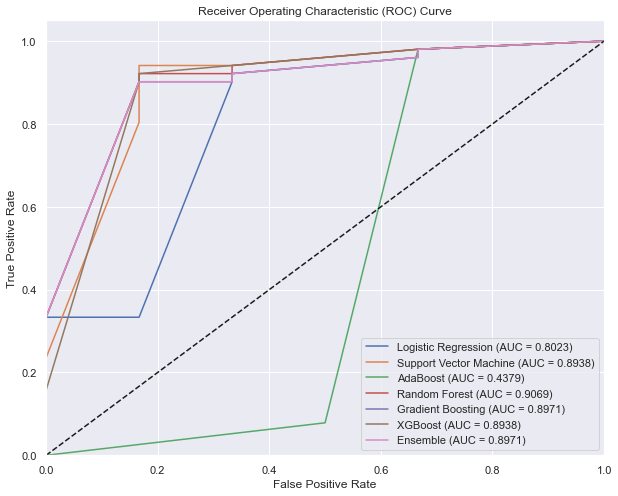

In [49]:
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    y_proba = clf.predict_proba(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

# Ensemble model ROC curve
y_proba_ensemble = ensemble_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.4f})")

# Plotting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## 6. Result Visualization: Import the appropriate visualization package and: 

#### A. Plot the feature importance in descending order for each of the models using horizontal bar chart

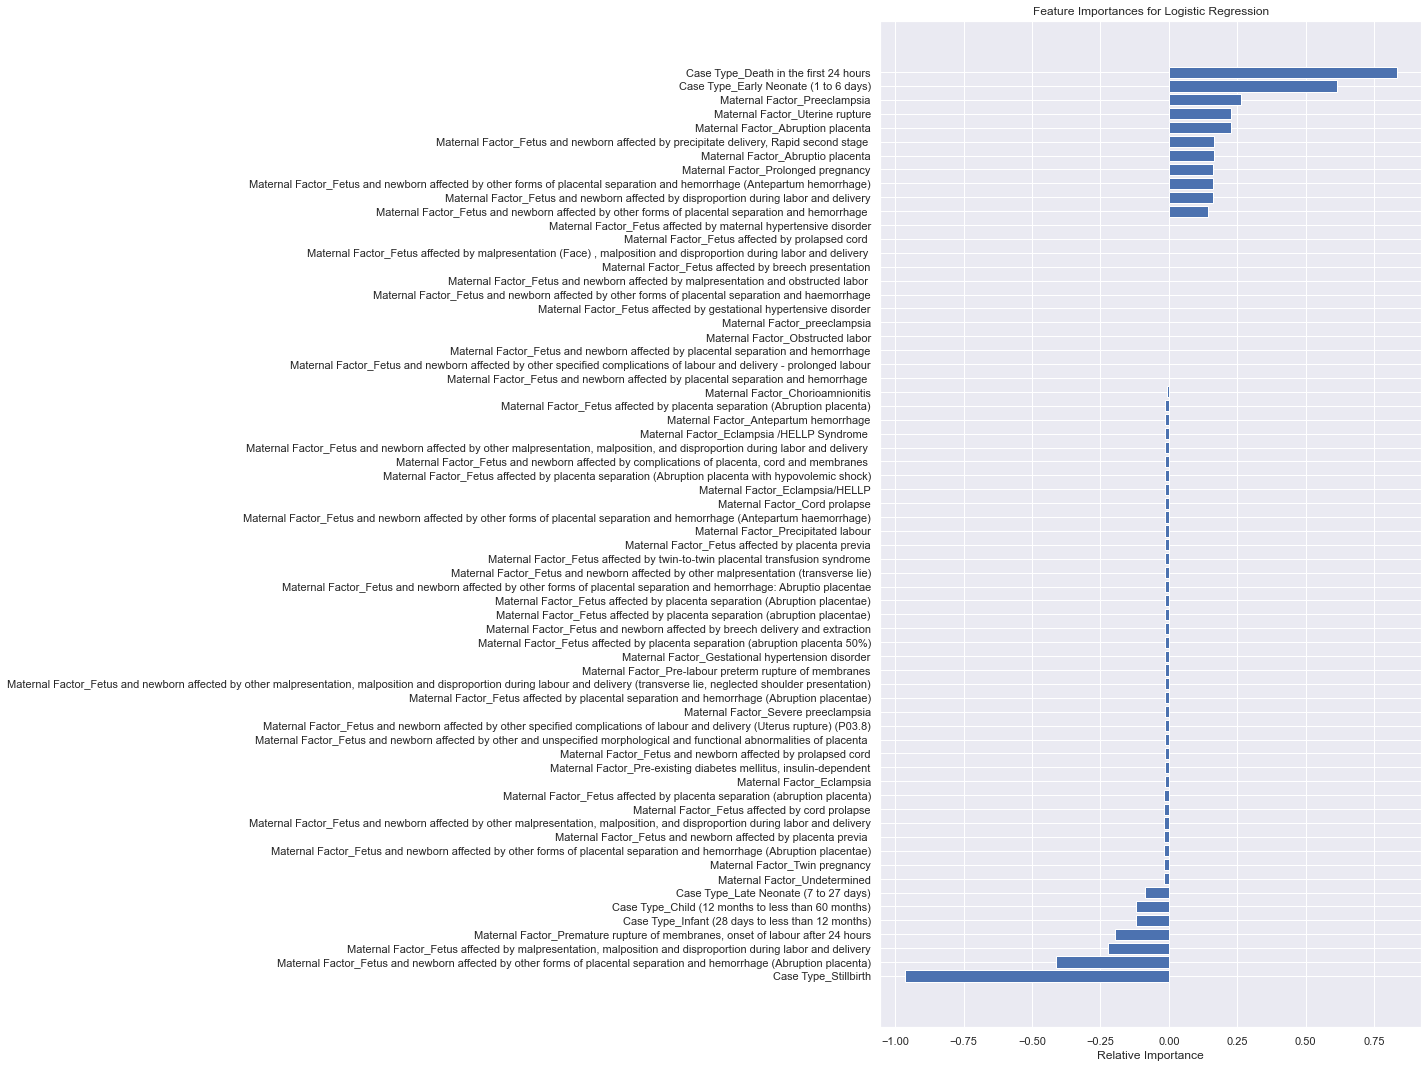

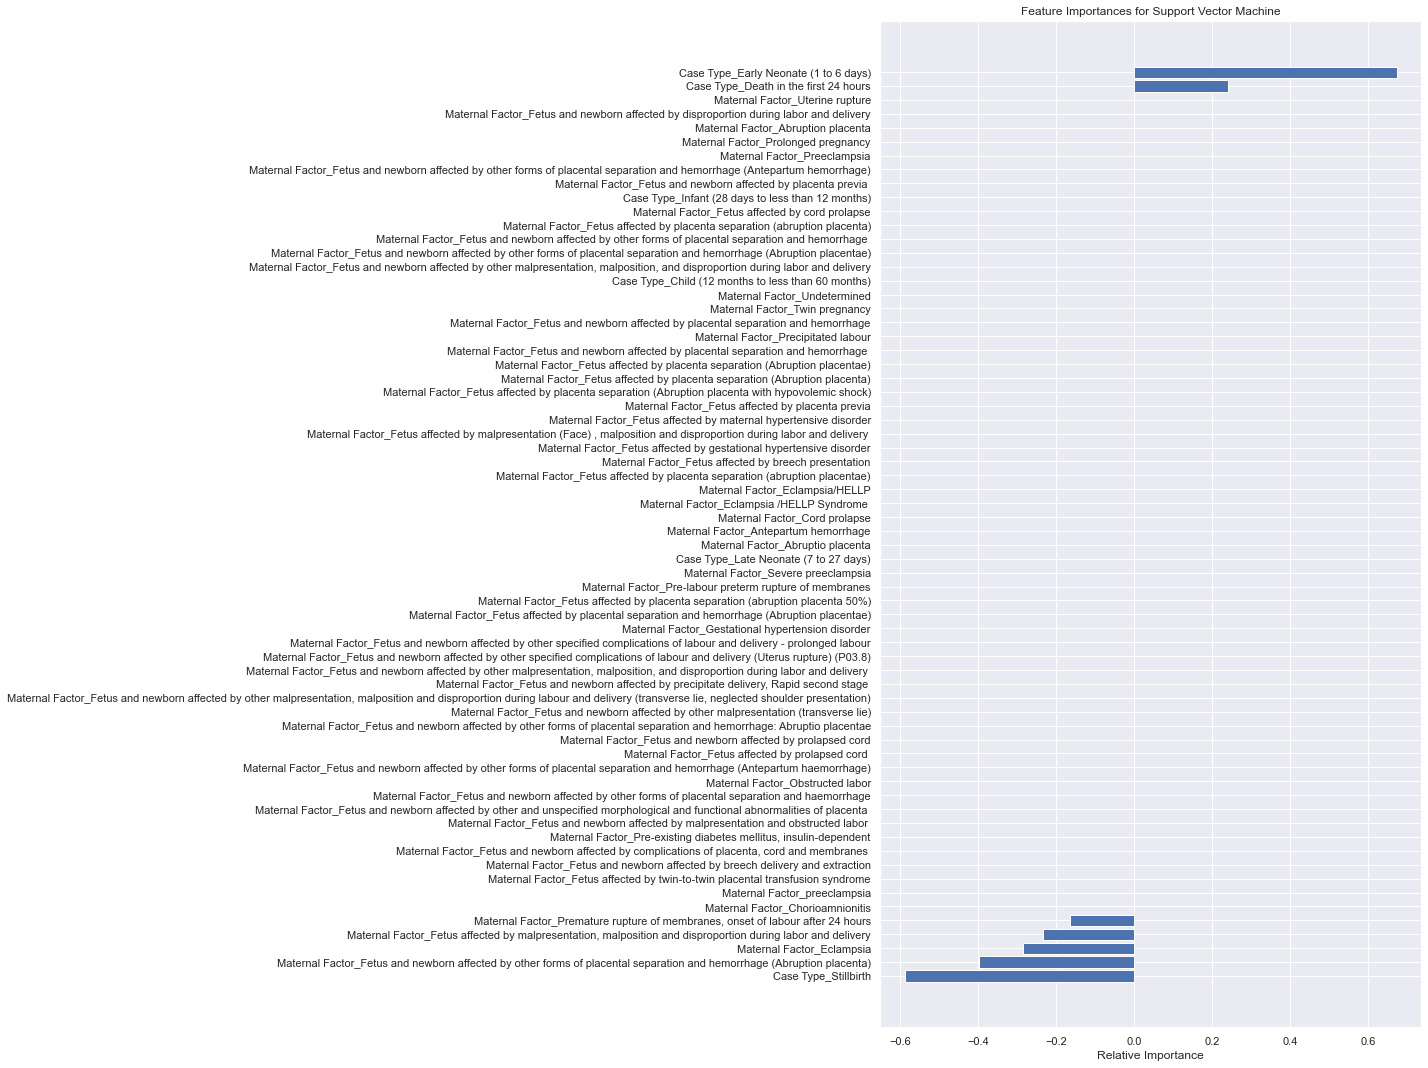

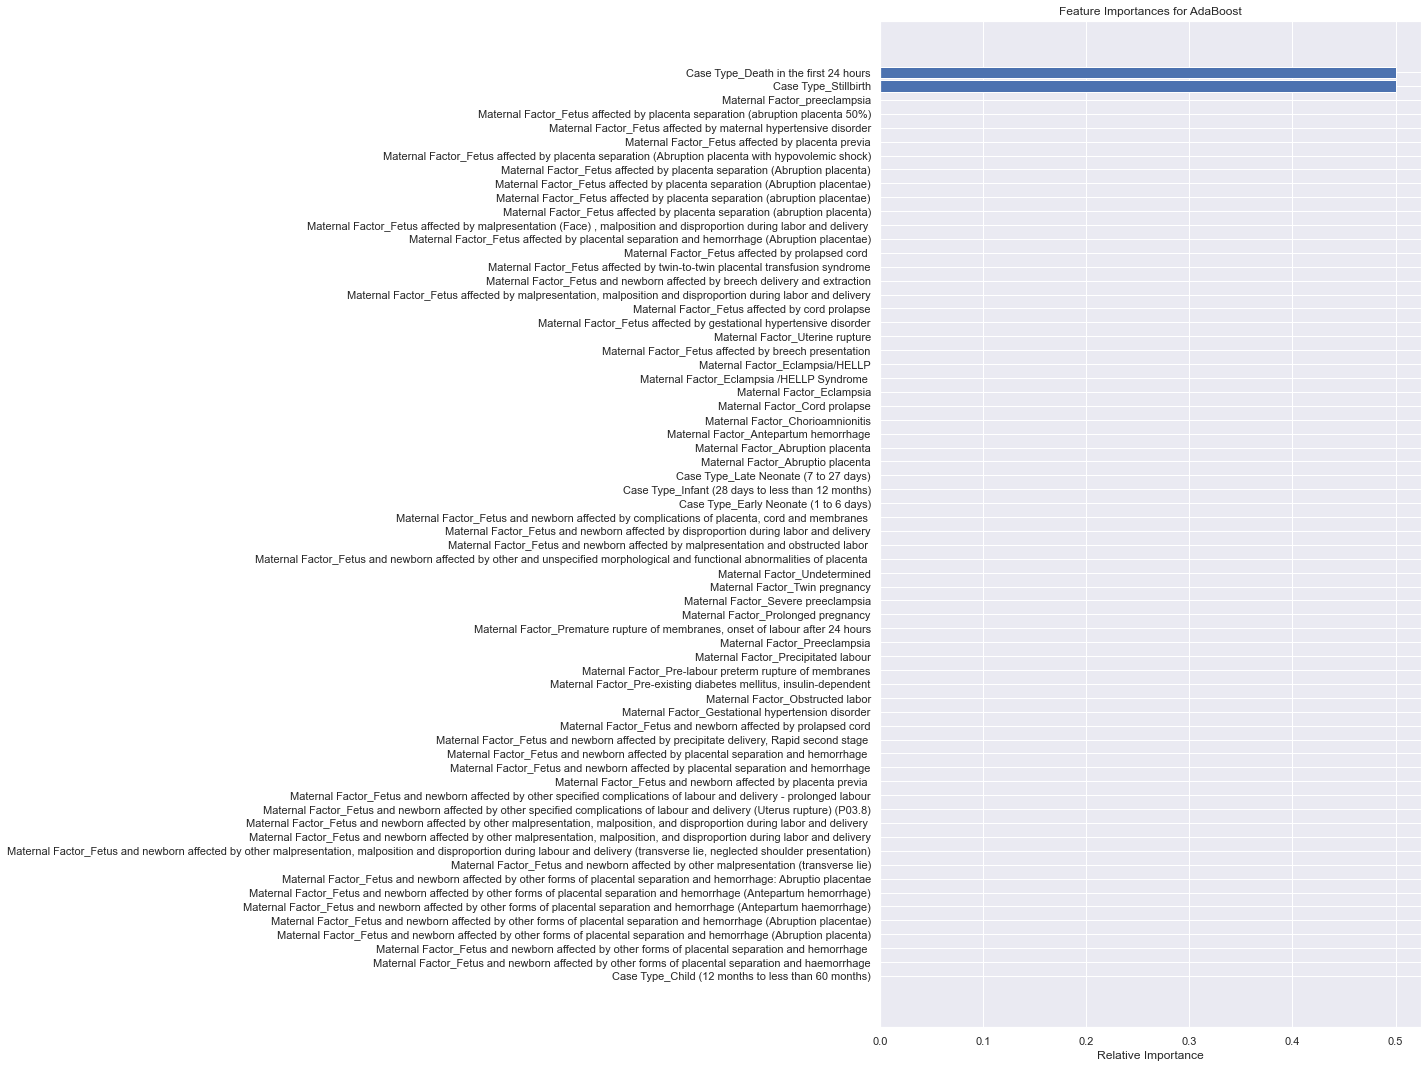

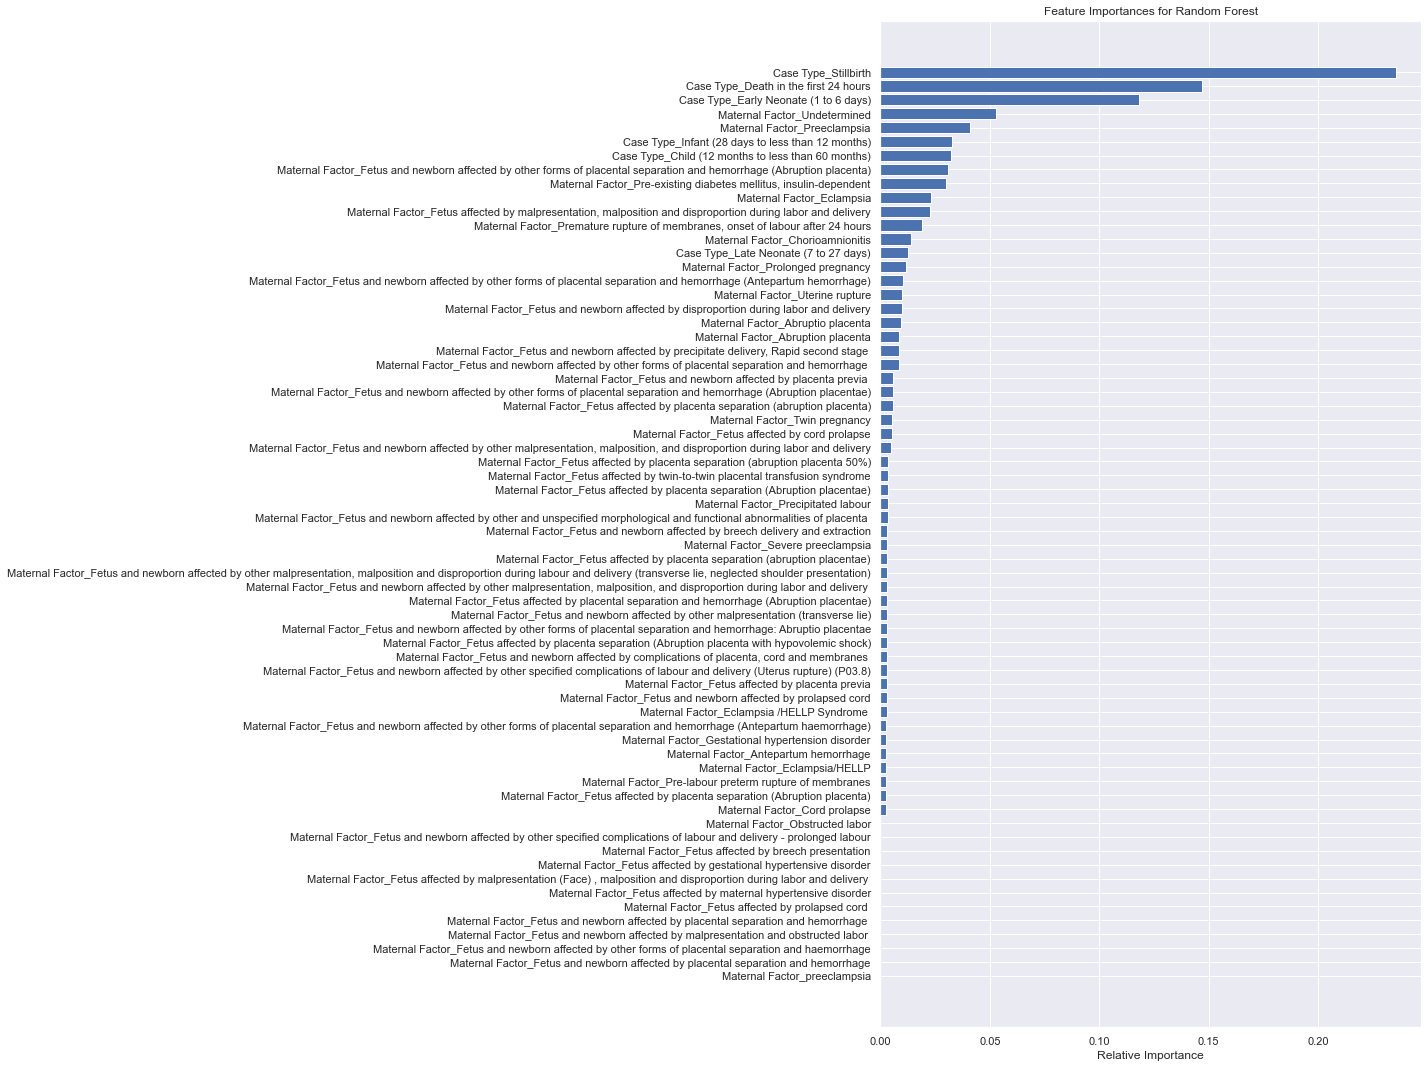

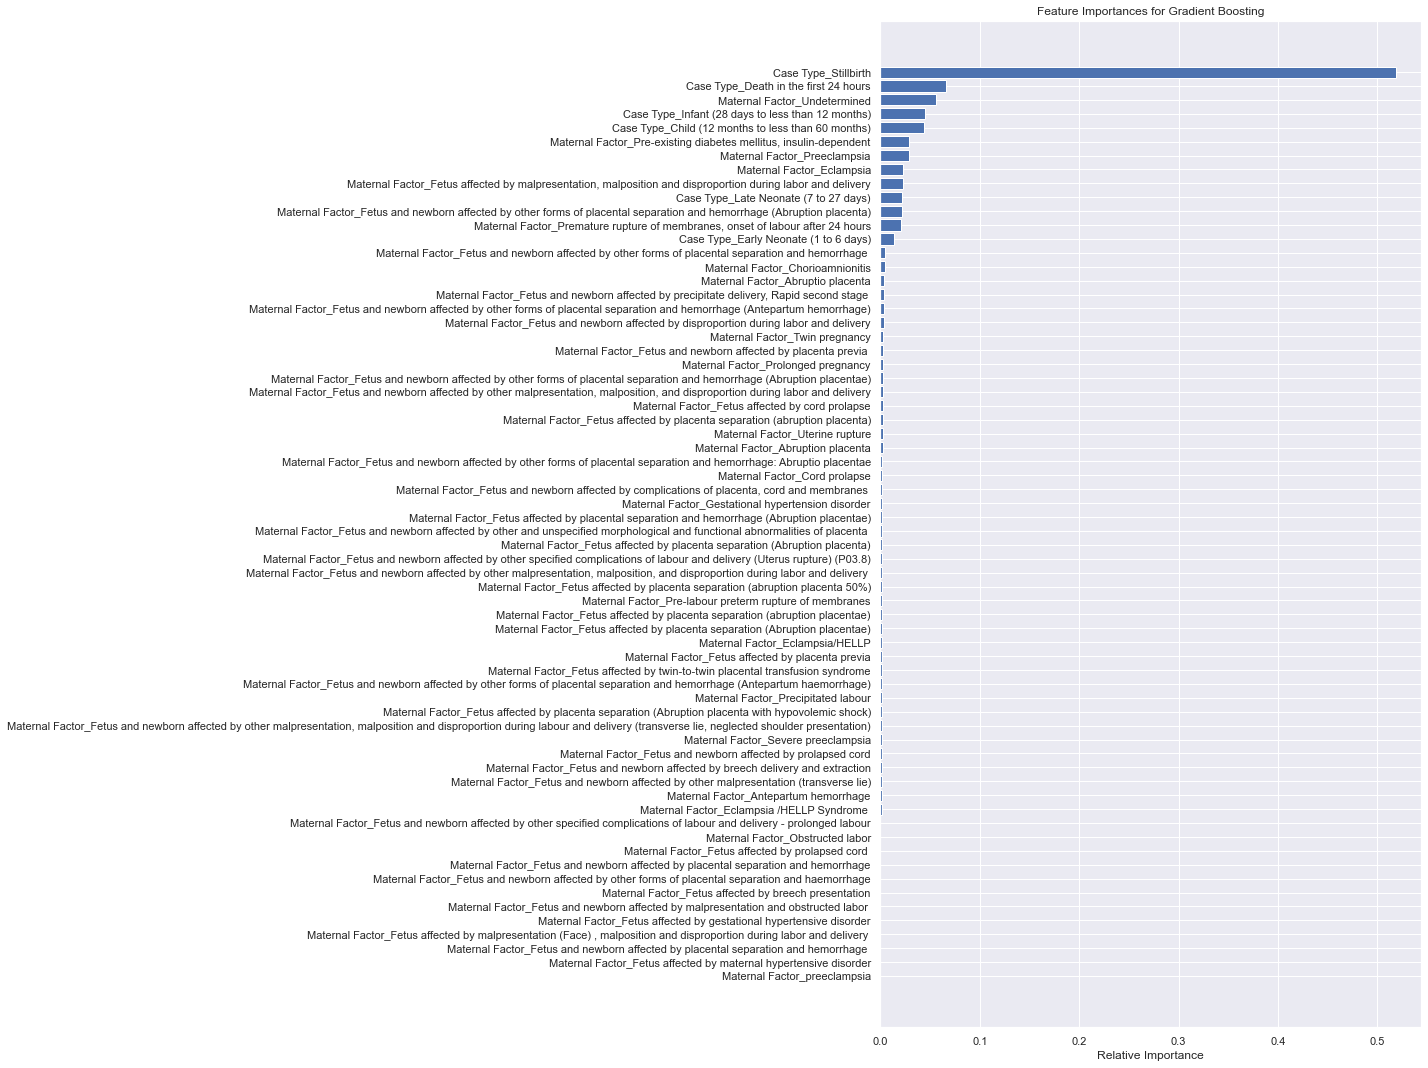

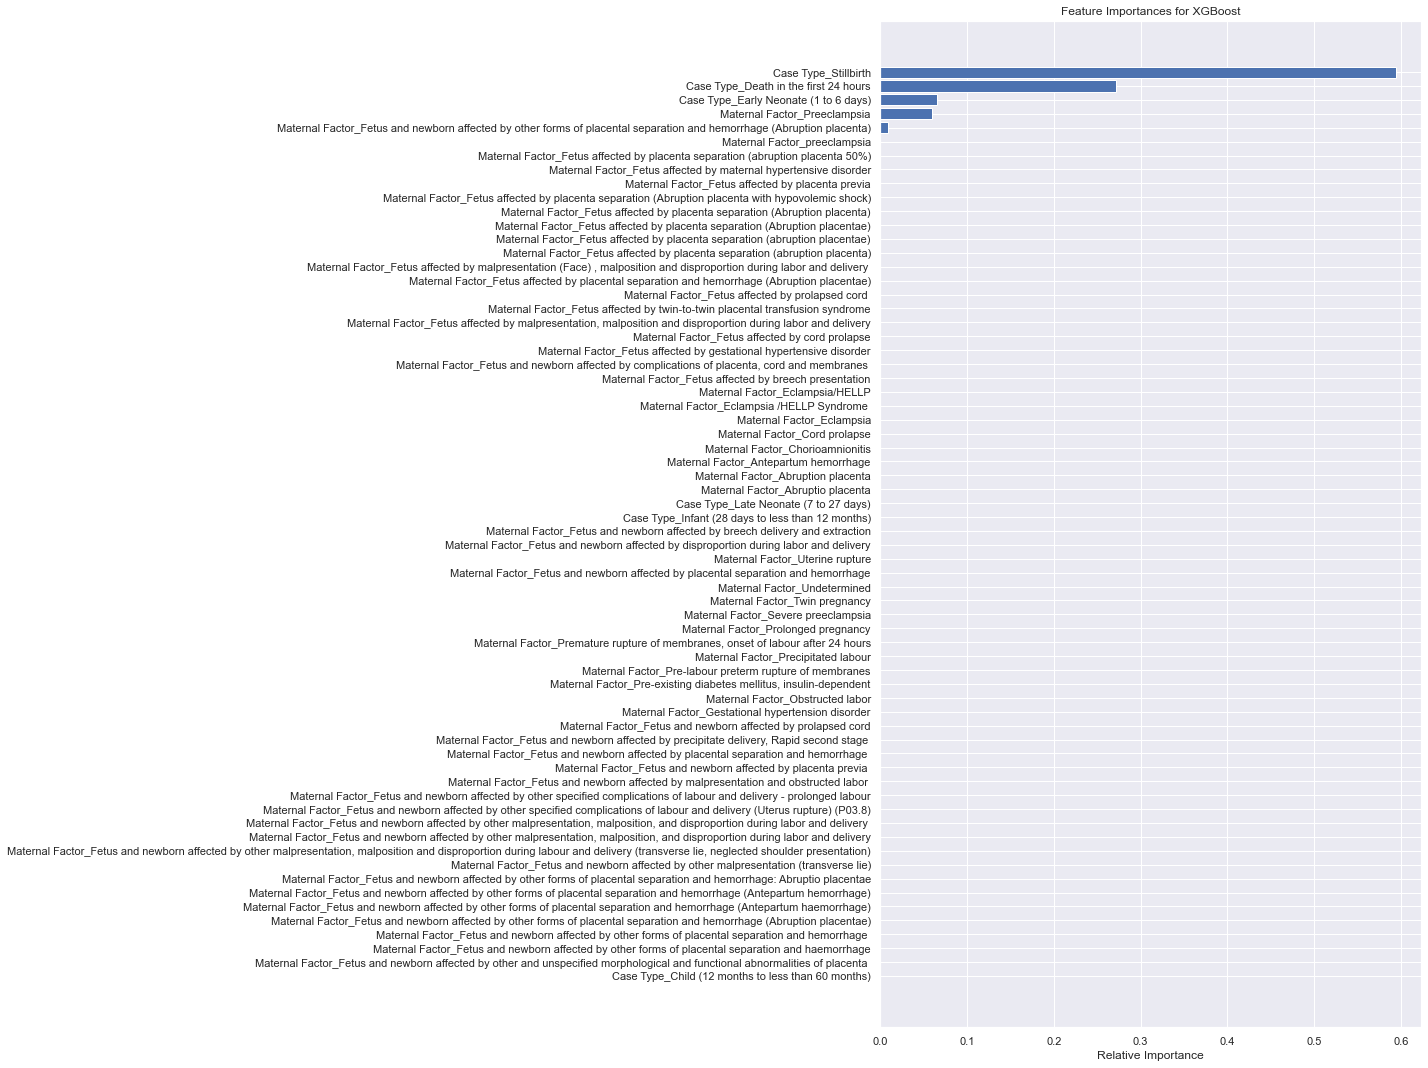

In [59]:
# plot  feature importance 
def plot_feature_importance(importances, model_name, feature_names):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(20, 15))
    plt.title(f'Feature Importances for {model_name}')
    plt.barh(range(len(importances)), importances[indices], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot feature importances for each classifier
for name, importances in feature_importances.items():
    plot_feature_importance(importances, name, X.columns)



#### B. Plot the top five infant underlying causes of the child death 

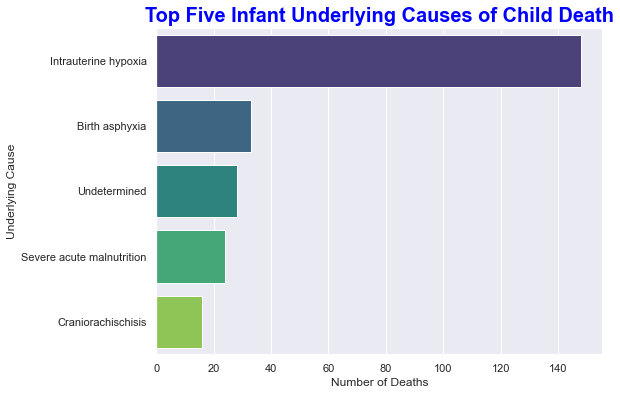

In [67]:
top_infant_causes = df_deco['Underlying Cause'].value_counts().head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_infant_causes.values, y=top_infant_causes.index, palette='viridis')
plt.title('Top Five Infant Underlying Causes of Child Death', fontsize = 20, fontweight = 'bold', color='blue')
plt.xlabel('Number of Deaths')
plt.ylabel('Underlying Cause')
plt.show()


#### C. Plot the top five maternal factors contributing to the child death

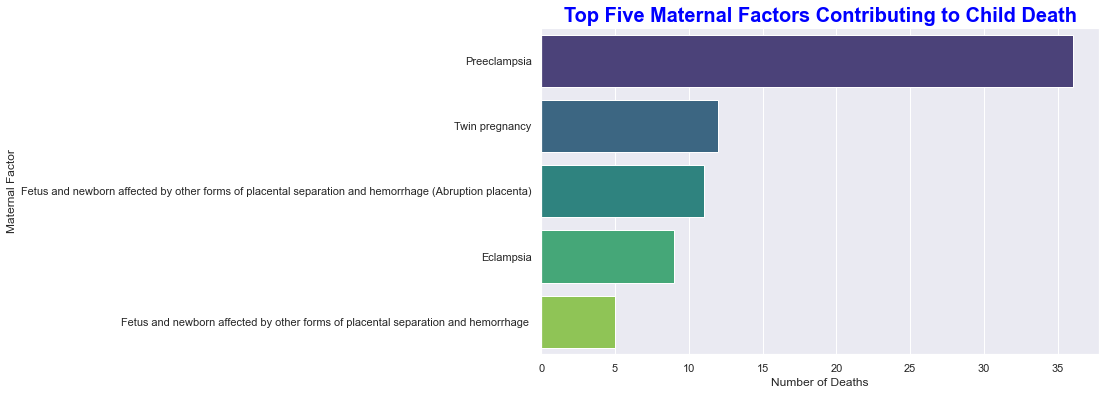

In [62]:
# Top 5 maternal factor contributing to child death
top_maternal_factors = df_deco['Maternal Factor'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_maternal_factors.values, y=top_maternal_factors.index, palette='viridis')
plt.title('Top Five Maternal Factors Contributing to Child Death', fontsize = 20, fontweight = 'bold', color='blue')
plt.xlabel('Number of Deaths')
plt.ylabel('Maternal Factor')
plt.show()


#### D. Plot the child death based on the case types 

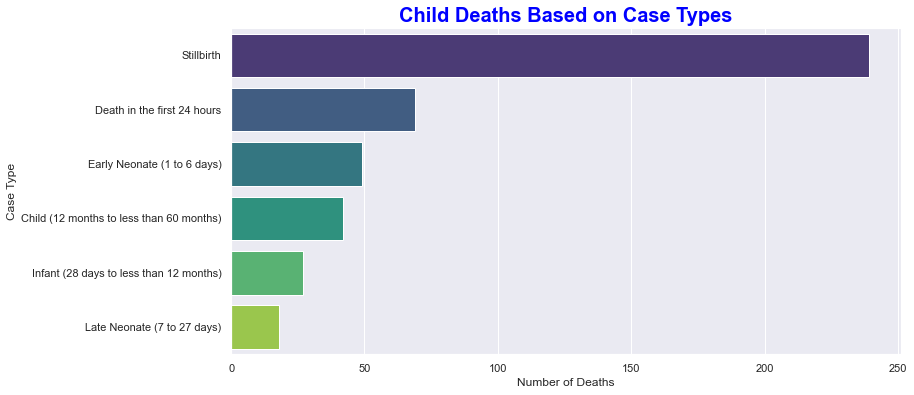

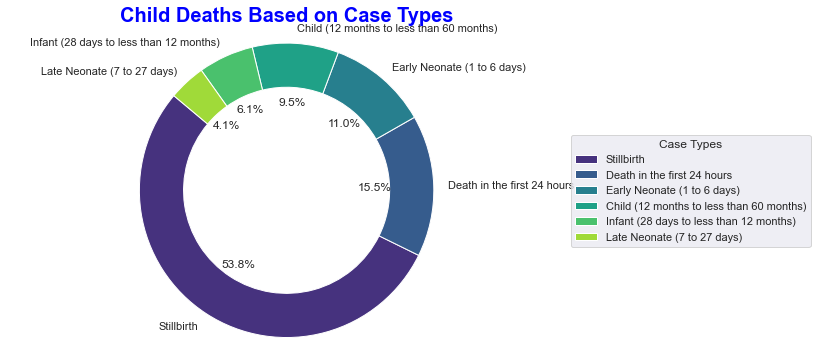

In [66]:
# based on case types
case_type_counts = df_deco['Case Type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=case_type_counts.values, y=case_type_counts.index, palette='viridis')
plt.title('Child Deaths Based on Case Types', fontsize = 20, fontweight = 'bold', color='blue')
plt.xlabel('Number of Deaths')
plt.ylabel('Case Type')
plt.show()

## using pie chart 
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    case_type_counts, labels=case_type_counts.index, autopct='%1.1f%%',
    startangle=140, colors=sns.color_palette('viridis', len(case_type_counts)),
    wedgeprops=dict(width=0.3)
)
plt.title('Child Deaths Based on Case Types', fontsize = 20, fontweight = 'bold', color='blue')
plt.legend(wedges, case_type_counts.index, title="Case Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
